<a href="https://colab.research.google.com/github/ysamokhotov/yandex-praktikum-projects/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20AB-%D1%82%D0%B5%D1%81%D1%82%D0%B0%20%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82%20%D0%BC%D0%B0%D0%B3%D0%B0%D0%B7%D0%B8%D0%BD%D0%B0/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_A_B_%D1%82%D0%B5%D1%81%D1%82%D0%B0_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82_%D0%BC%D0%B0%D0%B3%D0%B0%D0%B7%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт библиотек.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from google.colab import drive

## Гипотезы.

In [2]:
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/ЯП/Проекты/df/hypothesis.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
pd.options.display.max_colwidth = 100
display(df)
df.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
df.columns = df.columns.str.lower()

### Приоритизируем гипотезы, применив фреймворк ICE.

In [5]:
df['ice'] = round((df['impact'] * df['confidence']) / df['efforts'])
df[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


### Приоритизируем гипотезы, применив фреймворд RICE.

In [6]:
df['rice'] = (df['impact'] * df['confidence'] * df['reach']) / df['efforts']
df[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


*Как мы видим после добавления параметра охвата приоритизация изменилась, что говорит о том, что гипотезы 7 и 2 имеют больший охват аудитории нежели гипотеза 8, лидировавшая по ICE.*

##Анализ A/B-теста.

### Предобработка.

In [7]:
visitors = pd.read_csv('gdrive/My Drive/Colab Notebooks/ЯП/Проекты/df/visitors.csv')
orders = pd.read_csv('gdrive/My Drive/Colab Notebooks/ЯП/Проекты/df/orders.csv')

In [8]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
orders = orders.rename({'transactionId':'transaction_id', 'visitorId':'visitor_id'}, axis=1)

In [11]:
# проверяем явные дубликаты
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


In [12]:
# проверяем пропуски
numbers_of_nulls_orders = pd.DataFrame(columns=['names'], data=orders.columns)
numbers_of_nulls_orders['nulls'] = orders.isnull().sum().values
numbers_of_nulls_orders['nulls_percent'] = 100*numbers_of_nulls_orders['nulls']/orders.shape[0]

numbers_of_nulls_visitors = pd.DataFrame(columns=['names'], data=visitors.columns)
numbers_of_nulls_visitors['nulls'] = visitors.isnull().sum().values
numbers_of_nulls_visitors['nulls_percent'] = 100*numbers_of_nulls_visitors['nulls']/visitors.shape[0]

print(numbers_of_nulls_orders) 
print()
print(numbers_of_nulls_visitors)

            names  nulls  nulls_percent
0  transaction_id      0            0.0
1      visitor_id      0            0.0
2            date      0            0.0
3         revenue      0            0.0
4           group      0            0.0

      names  nulls  nulls_percent
0      date      0            0.0
1     group      0            0.0
2  visitors      0            0.0


*Пропусков и дубликатов нет*

In [13]:
# проверяем сколько групп в тесте и пользователей в каждой группе
t = visitors.groupby('group')['visitors'].sum()
display(t)
print('Разница в количестве между группами %:',round((((t.to_list()[1] - t.to_list()[0]) / t.to_list()[0]) * 100),2))

group
A    18736
B    18916
Name: visitors, dtype: int64

Разница в количестве между группами %: 0.96


*В группе В на 1% больше пользователей, примем это за погрешность*

In [14]:
# проверяем даты начала и окончания теста в каждой группе
visitors.groupby('group')['date'].agg(['min', 'max'])

,min,max
group,,
A,2019-08-01,2019-08-31
B,2019-08-01,2019-08-31


*Сроки проведения теста в обеих группах совпадают*

In [15]:
# проверяем количество пользователей, попавших в обе группы
unique_customers = len(orders['visitor_id'].unique())
t = orders.groupby('visitor_id', as_index=False)['group'].nunique()
t = t[t['group'] > 1]['visitor_id'].count()
print(f'Всего пользователей, сделавших покупку и попавших в обе группы: {t}')
print('Процент пользователей, попавших в обе группы, от общего числа сделавших покупку: ', round((t * 100 / unique_customers),1))

Всего пользователей, сделавших покупку и попавших в обе группы: 58
Процент пользователей, попавших в обе группы, от общего числа сделавших покупку:  5.6


*58 пользователей из числа купивших попали сразу в обе группы или 5.6% от общего количества покупателей.*

*Возможно, не был проведен А/А тест и закралась техническая ошибка в распределении пользователей по группам.*

*Удалять этих пользователей из анализа не будем.*

### График кумулятивной выручки по группам и выводы.

In [16]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


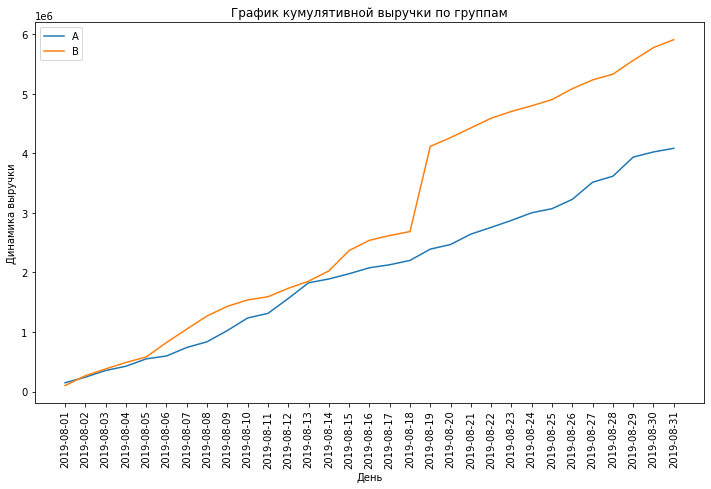

In [17]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 7))

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.ylabel('Динамика выручки')
plt.xlabel('День')
plt.xticks(rotation=90)
plt.legend()
plt.show()

*Выручка растет почти равномерно.*

*В группе В менее линейный рост, что может свидетельствовать о наличии аномально дорогих заказов или вспесках кол-ва покупок в отдельные даты.*

### График кумулятивного среднего чека по группам и выводы.

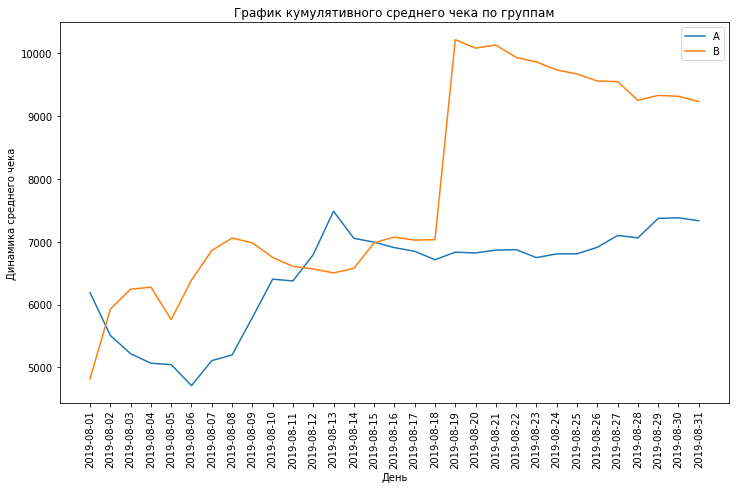

In [18]:
plt.figure(figsize=(12, 7))

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Динамика среднего чека')
plt.xlabel('День')
plt.xticks(rotation=90)
plt.legend()
plt.show()

*Покупки 18 числа в группе В сильно отразились на среднем чеке - срежний чек скакнул до 10000, после 19 числа начал падать, что также указывает на наличие отдельных выбросов в сумме или количестве заказов.*

*Средний чек группы А относительно стабилен вокруг значения 7000.*

### График относительного изменения кумулятивного среднего чека группы B к группе A и выводы.

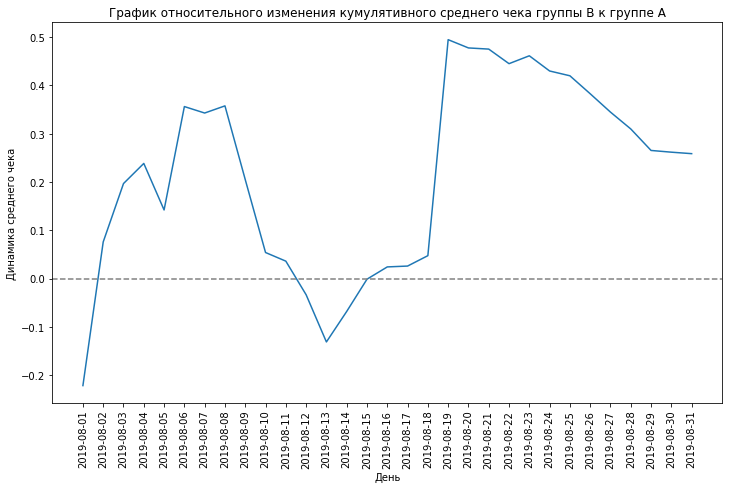

In [19]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 7))

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

# визуализируем 0 границу
plt.axhline(y=0, color='grey', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Динамика среднего чека')
plt.xlabel('День')
plt.xticks(rotation=90)
plt.show()

*График сильно "скачет", что также намекает на наличие выбросов и аномалий, поэтому пока не будем делать заключений о превосходстве той или иной группы.*

### График относительного изменения кумулятивной конверсии группы B к группе A и выводы.

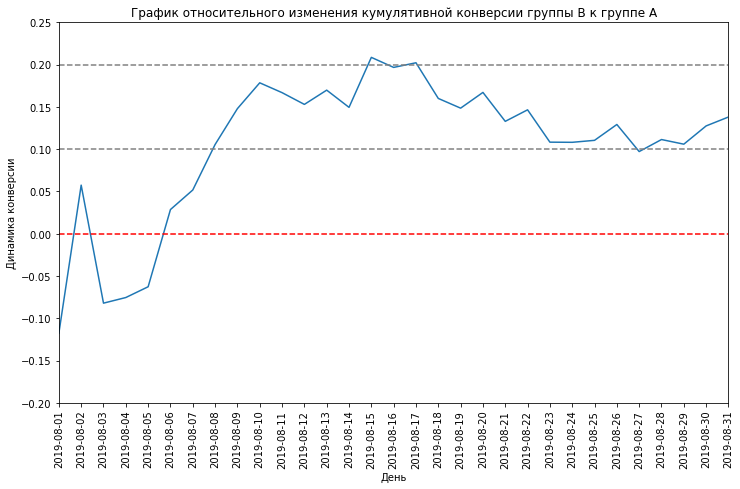

In [20]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим график
plt.figure(figsize=(12, 7))

merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

# задаем масштаб осей
plt.axis([cumulative_data['date'].min(), cumulative_data['date'].max(), -0.2, 0.25])

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.ylabel('Динамика конверсии')
plt.xlabel('День')
plt.xticks(rotation=90)
plt.show()

*Сначала конверсия в группе В проигрывала, затем вырвалась вперед и с 8 числа установилась на уровне +10/20% от группы А.*

### График количества заказов по пользователям и выводы.

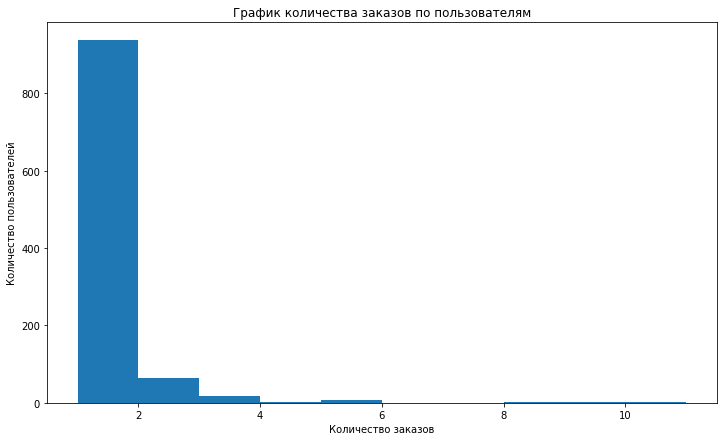

In [21]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

plt.figure(figsize=(12, 7))
orders_by_users.columns = ['user_id', 'orders']
plt.hist(orders_by_users['orders'])
plt.title('График количества заказов по пользователям')
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов')
plt.show()

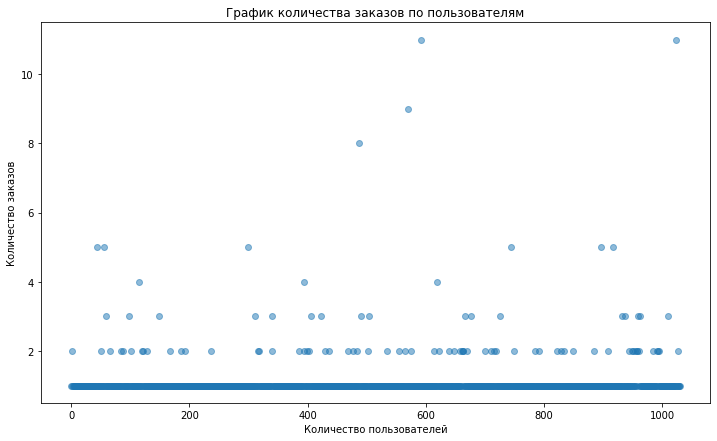

In [22]:
x_values = pd.Series(range(0,len(orders_by_users)))

plt.figure(figsize=(12, 7))
plt.scatter(x_values, orders_by_users['orders'], alpha=0.5)
plt.title('График количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.show()

*Большинство пользователей сделали 1-2 заказа, но также есть и те, кто сделал более 10 заказов. Нашли первые аномалии.*

### Определим аномальное количество заказов на пользователя.

In [23]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

*Не менее 95% пользователей сделали не более 2х заказов, не менее 99% сделали не более 4х. Будем считать аномалиями количество заказов больше 2х.*

### Точечный график стоимостей заказов ("сырые" vs "чистые" данные) и выводы.

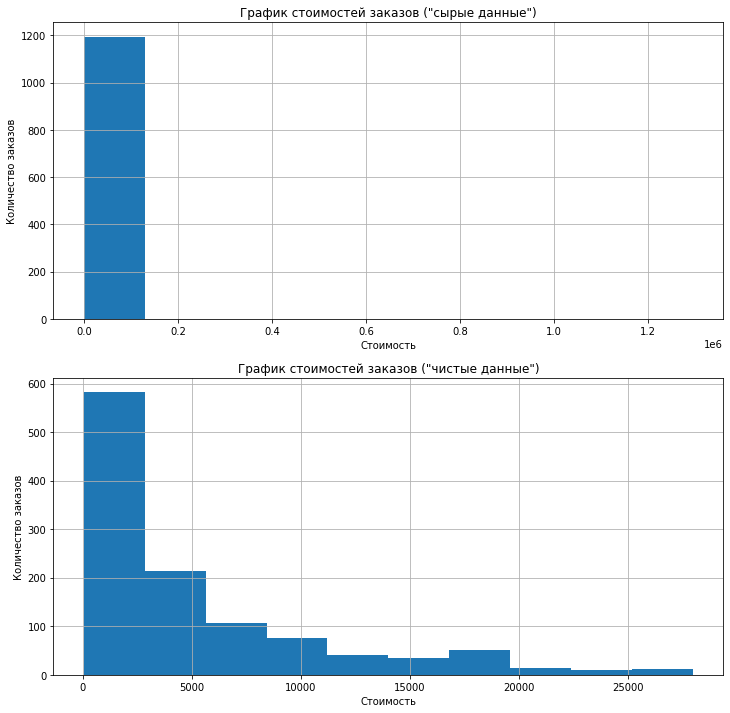

In [24]:
fig, ax = plt.subplots(2)
# 'сырые' данные
orders['revenue'].hist(ax=ax[0], figsize=(12, 12))
# 'чистые' данные, 95 перцентиль
orders[orders['revenue'] <= np.percentile(orders['revenue'], [95][0])]['revenue'].hist(ax=ax[1], figsize=(12, 12))

ax[0].title.set_text('График стоимостей заказов ("сырые данные")')
ax[1].title.set_text('График стоимостей заказов ("чистые данные")')
ax[0].set_xlabel('Стоимость')
ax[0].set_ylabel('Количество заказов')
ax[1].set_xlabel('Стоимость')
ax[1].set_ylabel('Количество заказов')

plt.show()

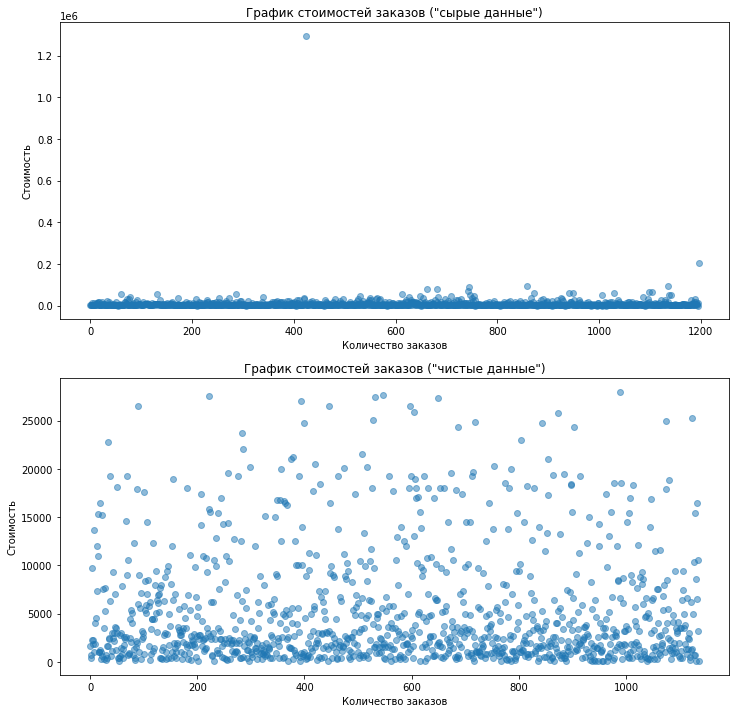

In [25]:
x_values1 = pd.Series(range(0,len(orders)))
x_values2 = pd.Series(range(0,len(orders[orders['revenue'] <= np.percentile(orders['revenue'], [95][0])]['revenue'])))

fig, ax = plt.subplots(2, figsize=(12, 12))
# 'сырые' данные
ax[0].scatter(x_values1, orders['revenue'], alpha=0.5)
# 'чистые' данные, 95 перцентиль
ax[1].scatter(x_values2, orders[orders['revenue'] <= np.percentile(orders['revenue'], [95][0])]['revenue'], alpha=0.5)

ax[0].title.set_text('График стоимостей заказов ("сырые данные")')
ax[1].title.set_text('График стоимостей заказов ("чистые данные")')
ax[0].set_xlabel('Количество заказов')
ax[0].set_ylabel('Стоимость')
ax[1].set_xlabel('Количество заказов')
ax[1].set_ylabel('Стоимость')

plt.show()

*Стоимость большей части заказов не превышает 100 000, однако есть отдельные выбросы - есть заказ стоимостью более 1 200 000 и заказ на 200 000.*

### Определим аномальные стоимости заказов.

In [26]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

*Не менее 95% заказов были стоимостью до 28 000, не менее 99% до 58 200, будем считать аномальными заказы, не входящие в 95% перцентиль.*

### Выберем стат. тест и посчитаем статистическую значимость различий в конверсии между группами по "сырым" данным, сделаем выводы.

*Будем использовать непараметрический тест Манна-Уитни, т.к. распределение не нормальное.* 

*Н0 - стат. значимых отличий нет.*

*H1 - стат. значимые отличия есть.*

*Установим уровень значимости - 5%*

In [27]:
# считаем количество пользователей по группам и дням
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

data = (
    visitors_a_daily.merge(
        visitors_b_daily, left_on='date', right_on='date', how='left'))

data.head()

,date,visitors_per_date_a,visitors_per_date_b
0,2019-08-01,719,713
1,2019-08-02,619,581
2,2019-08-03,507,509
3,2019-08-04,717,770
4,2019-08-05,756,707


In [28]:
# создаем переменные orders_by_users_a и orders_by_users_b со столбцами ['user_id', 'orders'], где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['user_id', 'orders']

In [29]:
# создаем переменные sample_a и sample_b, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули.
sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)
sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

In [30]:
# считаем p-value для сравнения среднего между группами
print('P-value:',"{0:.3f}".format(st.mannwhitneyu(sample_a, sample_b)[1]))

# считаем относительное различие в среднем между группами
print('Отношение средних группы В к группе А:',"{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

P-value: 0.020
Отношение средних группы В к группе А: 0.133


*Отвергаем Н0, т.к. вероятность меньше 5%, значит стат. значимые различия есть.*

*Прирост конверсии группы В относительно А примерно 13%*

### Выберем стат. тест и посчитаем статистическую значимость различий в среднем чеке между группами по "сырым" данным, сделаем выводы.

*Будем использовать непараметрический тест Манна-Уитни, т.к. распределение не нормальное.* 

*Н0 - стат. значимых отличий нет.*

*H1 - стат. значимые отличия есть.*

*Установим уровень значимости - 5%*

In [31]:
print('P-value:','{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Отношение средних группы В к группе А:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.729
Отношение средних группы В к группе А: 0.259


*Не можем отвергнуть Н0, т.к. вероятность получить такие же или более экстремальные различия случайно более 5%.*

*Разница в среднем чеке между группами примерно 25% в пользу группы В.*

### Выберем стат. тест и посчитаем статистическую значимость различий в конверсии между группами по "чистым" данным, сделаем выводы.

In [32]:
# делаем срез аномальных покупок по пользователям
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 2]['user_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['user_id']
    ],
    axis=0
)

users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitor_id']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates().sort_values()
)

In [33]:
# отфильтровываем аномалии для группы А
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))
        ]['orders'],
     
        pd.Series(
            0, 
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        )
    ],
    axis=0,
)

# отфильтровываем аномалии для группы В
sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))
        ]['orders'],
     
        pd.Series(
            0, 
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        )
    ],
    axis=0,
)

*Будем использовать непараметрический тест Манна-Уитни, т.к. распределение не нормальное.*

*Н0 - стат. значимых отличий нет.*

*H1 - стат. значимые отличия есть.*

*Установим уровень значимости - 5%*

In [34]:
print('P-value:','{0:.3f}'.format(st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Отношение средних группы В к группе А:','{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

P-value: 0.013
Отношение средних группы В к группе А: 0.173


*Как и в случае с сырыми данными - отвергаем Н0, стат. значимые различия есть, здесь это более выраженно, вероятность случайно получить такие или более экстремальные различия всего 1,3%*

*Прирост конверсии группы В относительно А оказался выше, чем в тесте с сырыми данными - примерно 17%*

### Выберем стат. тест и посчитаем статистическую значимость различий в среднем чеке между группами по "чистым" данным, сделаем выводы.

*Будем использовать непараметрический тест Манна-Уитни, т.к. распределение не нормальное.*

*Н0 - стат. значимых отличий нет.*

*H1 - стат. значимые отличия есть.*

*Установим уровень значимости - 5%*

In [35]:
# применяем тест Манна-Уитни к отфильтрованным данным
print('P-value:',
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Отношение средних группы В к группе А:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.738
Отношение средних группы В к группе А: -0.020


*Не можем отвергнуть Н0, как и при тестировании сырых данных, статистически значимых различий нет.*

*Разницы в среднем чеке между группами почти нет - 2% в пользу группы А.*

### Примем решение о продолжении или остановке эксперимента.

По результатам теста принимаем решение остановить тест и зафиксировать победу группы В.

Обнаружены стат. значимые различия в конверсии между группами, прирост консверсии в группе В относительно группы А составил около 17%.

Стат. значимых различий в среднем чеке не обнаружено, прирост среднего чека группы В также незначительный и составляет 2% над группой А

Это говорит о том, что, несмотря на то, что средний чек покупки не изменился, общее количество покупок выросло, следовательно выросла целевая метрика - выручка.
